# Import Dependencies


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


# Load the dataset

In [4]:
# Load Bawang Merah dataset
bawang_merah = pd.read_csv('Harga Bahan Pangan/train/Bawang Merah.csv')
# Load Bawang Putih dataset
bawang_putih = pd.read_csv('Harga Bahan Pangan/train/Bawang Putih Bonggol.csv')
# Load the Beras Medium dataset
beras_med = pd.read_csv('Harga Bahan Pangan/train/Beras Medium.csv')
# Load the Beras Premium dataset
beras_prem = pd.read_csv('Harga Bahan Pangan/train/Beras Premium.csv')
# Load Cabai Merah dataset
cabai_merah = pd.read_csv('Harga Bahan Pangan/train/Cabai Merah Keriting.csv')
# Load Cabai Rawit dataset
cabai_rawit = pd.read_csv('Harga Bahan Pangan/train/Cabai Rawit Merah.csv')
# Load Daging Ayam dataset
daging_ayam = pd.read_csv('Harga Bahan Pangan/train/Daging Ayam Ras.csv')
# Load Daging Sapi dataset
daging_sapi = pd.read_csv('Harga Bahan Pangan/train/Daging Sapi Murni.csv')
# Load Gula Pasir dataset
gula_pasir = pd.read_csv('Harga Bahan Pangan/train/Gula Konsumsi.csv')
# Load Minyak Goreng Curah dataset
minyak_goreng_curah = pd.read_csv('Harga Bahan Pangan/train/Minyak Goreng Curah.csv')
# Load Minyak Goreng Kemasan Sederhana dataset
minyak_goreng_kemasan = pd.read_csv('Harga Bahan Pangan/train/Minyak Goreng Kemasan Sederhana.csv')
# Load Telur Ayam dataset
telur_ayam = pd.read_csv('Harga Bahan Pangan/train/Telur Ayam Ras.csv')
# Load Tepung Terigu dataset
tepung_terigu = pd.read_csv('Harga Bahan Pangan/train/Tepung Terigu (Curah).csv')

In [5]:
# Check the shape of each dataset
for dataset in [beras_prem, beras_med, bawang_putih, bawang_merah, cabai_merah, cabai_rawit, daging_ayam, daging_sapi, gula_pasir, minyak_goreng_curah, minyak_goreng_kemasan, telur_ayam, tepung_terigu]:
    print(dataset.shape, dataset.isnull().sum().sum())

(1004, 35) 1241
(1004, 35) 1241
(1004, 35) 1241
(1004, 35) 1241
(1004, 35) 1244
(1004, 35) 2035
(1004, 35) 1241
(1004, 35) 1245
(1004, 35) 1241
(1004, 35) 5437
(1004, 35) 1289
(1004, 35) 1241
(1004, 35) 1242


In [6]:
# Set the 'tanggal' column as the index for each dataset
for dataset in [beras_prem, beras_med, bawang_putih, bawang_merah, cabai_merah, cabai_rawit, daging_ayam, daging_sapi, gula_pasir, minyak_goreng_curah, minyak_goreng_kemasan, telur_ayam, tepung_terigu]:
    dataset.set_index('Date', inplace=True)

# Display the first 5 rows of each dataset
for dataset in [beras_prem, beras_med, bawang_putih, bawang_merah, cabai_merah, cabai_rawit, daging_ayam, daging_sapi, gula_pasir, minyak_goreng_curah, minyak_goreng_kemasan, telur_ayam, tepung_terigu]:
    print(dataset.head())

               Aceh     Bali   Banten  Bengkulu  DI Yogyakarta  DKI Jakarta  \
Date                                                                          
2022-01-01  12080.0  11500.0  11210.0   11350.0        11250.0      12660.0   
2022-01-02  12020.0  11500.0  11210.0   11400.0        11250.0      12660.0   
2022-01-03  11990.0  11500.0  11290.0   11370.0        11210.0      12390.0   
2022-01-04  12050.0  11630.0  11210.0   11410.0        11210.0      12390.0   
2022-01-05  12180.0  11670.0  11250.0   11590.0        11050.0      12390.0   

            Gorontalo    Jambi  Jawa Barat  Jawa Tengah  ...    Papua  \
Date                                                     ...            
2022-01-01    11230.0  12090.0     11580.0      11610.0  ...  14810.0   
2022-01-02    11290.0  11980.0     11600.0      11560.0  ...  15310.0   
2022-01-03    11230.0  12130.0     11620.0      11680.0  ...  15000.0   
2022-01-04    11330.0  12090.0     11610.0      11630.0  ...  15000.0   
2022-01-

In [7]:
import pandas as pd

def reshape_dataset(df, commodity_name):
    df_melted = df.melt(id_vars=['Date'], var_name='Provinsi', value_name=f'Harga_{commodity_name}')
    df_melted['Provinsi'] = df_melted['Provinsi'].str.strip()  # Remove any extra spaces
    return df_melted

# Load datasets
datasets = {
    'BawangMerah': 'Harga Bahan Pangan/train/Bawang Merah.csv',
    'BawangPutih': 'Harga Bahan Pangan/train/Bawang Putih Bonggol.csv',
    'BerasMedium': 'Harga Bahan Pangan/train/Beras Medium.csv',
    'BerasPremium': 'Harga Bahan Pangan/train/Beras Premium.csv',
    'CabaiMerah': 'Harga Bahan Pangan/train/Cabai Merah Keriting.csv',
    'CabaiRawit': 'Harga Bahan Pangan/train/Cabai Rawit Merah.csv',
    'DagingAyam': 'Harga Bahan Pangan/train/Daging Ayam Ras.csv',
    'DagingSapi': 'Harga Bahan Pangan/train/Daging Sapi Murni.csv',
    'GulaPasir': 'Harga Bahan Pangan/train/Gula Konsumsi.csv',
    'MinyakGorengCurah': 'Harga Bahan Pangan/train/Minyak Goreng Curah.csv',
    'MinyakGorengKemasan': 'Harga Bahan Pangan/train/Minyak Goreng Kemasan Sederhana.csv',
    'TelurAyam': 'Harga Bahan Pangan/train/Telur Ayam Ras.csv',
    'TepungTerigu': 'Harga Bahan Pangan/train/Tepung Terigu (Curah).csv'
}

# Reshape and merge datasets
merged_df = None
for commodity, path in datasets.items():
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
    df_melted = reshape_dataset(df, commodity)
    if merged_df is None:
        merged_df = df_melted
    else:
        merged_df = merged_df.merge(df_melted, on=['Date', 'Provinsi'], how='outer')

# Sort by Provinsi (alphabetical) first, then by Date (ascending)
merged_df = merged_df.sort_values(by=['Provinsi', 'Date'], ascending=[True, True]).reset_index(drop=True)

# Tampilkan hasil
merged_df.sample(5)


,Date,Provinsi,Harga_BawangMerah,Harga_BawangPutih,Harga_BerasMedium,Harga_BerasPremium,Harga_CabaiMerah,Harga_CabaiRawit,Harga_DagingAyam,Harga_DagingSapi,Harga_GulaPasir,Harga_MinyakGorengCurah,Harga_MinyakGorengKemasan,Harga_TelurAyam,Harga_TepungTerigu
7643,2023-09-08,Jambi,18930.0,35040.0,11790.0,14610.0,33290.0,36000.0,31320.0,136350.0,14540.0,14160.0,15980.0,28650.0,10780.0
25113,2022-01-14,Riau,26780.0,27810.0,12500.0,14530.0,31110.0,NaN,38580.0,136140.0,13350.0,NaN,19670.0,27280.0,9700.0
13200,2022-05-29,Kalimantan Tengah,44430.0,33780.0,11850.0,14870.0,62160.0,75760.0,42210.0,151670.0,14820.0,17370.0,24500.0,27780.0,9580.0
20215,2022-05-16,Maluku Utara,45020.0,44170.0,12600.0,13880.0,56550.0,66700.0,45720.0,120680.0,15890.0,NaN,27500.0,33160.0,10980.0
33608,2023-04-22,Sumatera Utara,30440.0,30610.0,12240.0,13450.0,26560.0,26280.0,32690.0,143300.0,14420.0,14700.0,17300.0,26250.0,10820.0


# Explorative Data Analysis

Dari eksplorasi, didapatkan beberapa poin
- Beras premium memiliki missing value pada harga setiap provinsi
- **Tidak ada** duplikat

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\1862750018.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=smt_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)


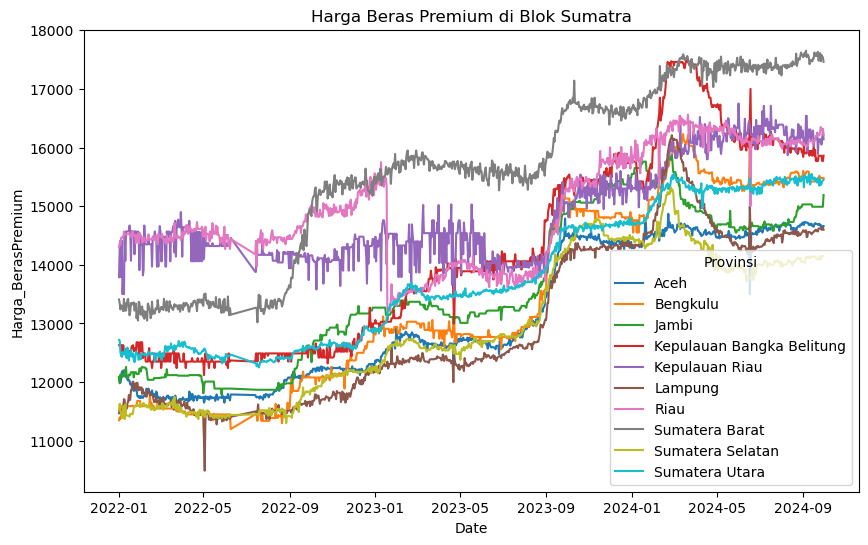

In [8]:
# Line plot of Beras Premium price in Aceh
# Blok Sumatra
sumatra_provinces = ['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kepulauan Riau', 'Jambi', 'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kepulauan Bangka Belitung']
smt_df = merged_df[merged_df['Provinsi'].isin(sumatra_provinces)]
    
plt.figure(figsize=(10, 6))
sns.lineplot(data=smt_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)
plt.title('Harga Beras Premium di Blok Sumatra')
plt.show()

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\2292704655.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=jawa_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)


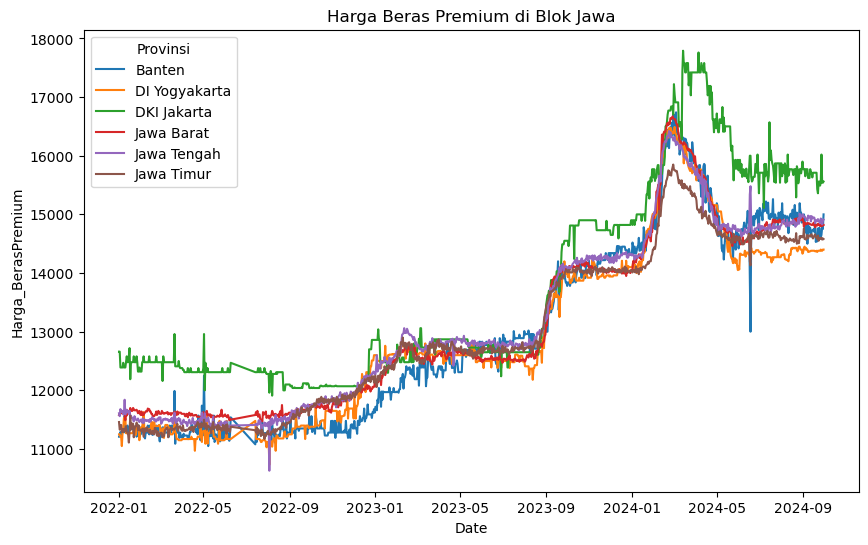

In [9]:
# Line plot of Beras Premium price in Jawa
# Blok Jawa
jawa_provinces = ['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Banten', 'DI Yogyakarta', 'DKI Jakarta']
jawa_df = merged_df[merged_df['Provinsi'].isin(jawa_provinces)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=jawa_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)
plt.title('Harga Beras Premium di Blok Jawa')
plt.show()

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\3732302473.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=kalimantan_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)


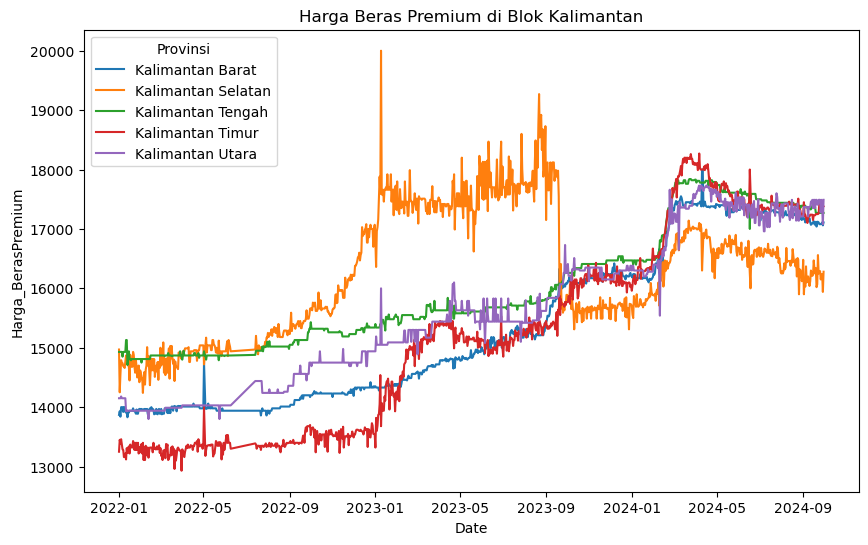

In [10]:
# Blok Kalimantan
kalimantan_provinces = ['Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan', 'Kalimantan Timur', 'Kalimantan Utara']
kalimantan_df = merged_df[merged_df['Provinsi'].isin(kalimantan_provinces)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=kalimantan_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)
plt.title('Harga Beras Premium di Blok Kalimantan')
plt.show()

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\537978623.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sulawesi_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)


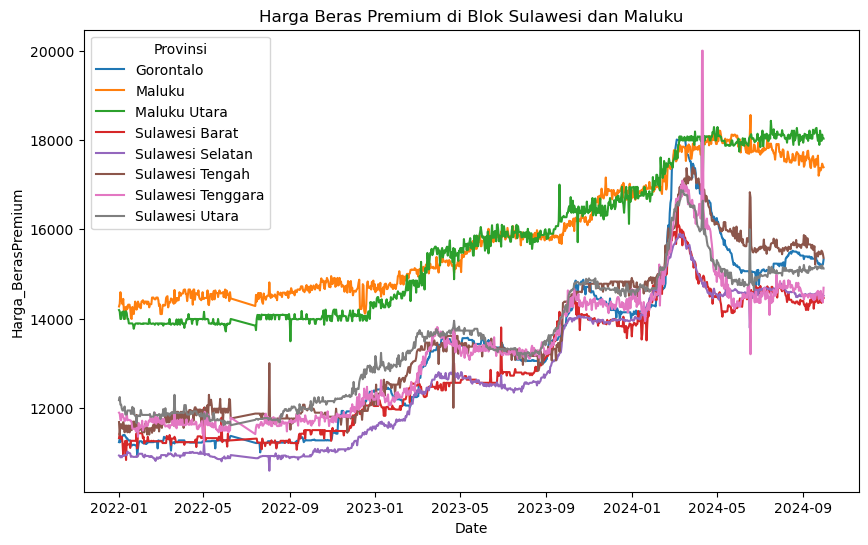

In [11]:
# Blok Sulawesi dan Maluku
sulawesi_provinces = ['Sulawesi Utara', 'Sulawesi Tengah', 'Sulawesi Selatan',
                      'Sulawesi Tenggara', 'Sulawesi Barat', 'Gorontalo', 'Maluku', 'Maluku Utara']
sulawesi_df = merged_df[merged_df['Provinsi'].isin(sulawesi_provinces)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=sulawesi_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)
plt.title('Harga Beras Premium di Blok Sulawesi dan Maluku')
plt.show()

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\2384022747.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=papua_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)


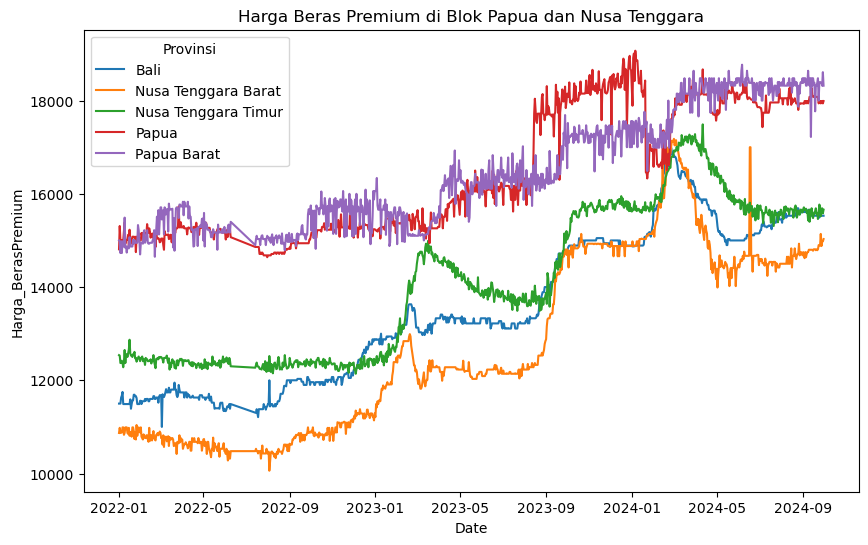

In [12]:
# Blok Papua dan Nusa Tenggara
papua_provinces = ['Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat']
papua_df = merged_df[merged_df['Provinsi'].isin(papua_provinces)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=papua_df, x='Date', y='Harga_BerasPremium', hue='Provinsi', ci=None)
plt.title('Harga Beras Premium di Blok Papua dan Nusa Tenggara')
plt.show()

# Preprocessing

In [13]:
provinces = ['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DI Yogyakarta', 'DKI Jakarta',
             'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur',
             'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah',
             'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka Belitung',
             'Kepulauan Riau', 'Lampung', 'Maluku Utara', 'Maluku',
             'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua Barat', 'Papua',
             'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
             'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
             'Sumatera Selatan', 'Sumatera Utara']

commodities = [i for i in merged_df.columns if 'Harga_' in i]

province_dfs = {province: merged_df[merged_df['Provinsi'] == province] for province in provinces}
province_dfs.items()


dict_items([('Aceh',            Date Provinsi  Harga_BawangMerah  Harga_BawangPutih  \
0    2022-01-01     Aceh            28970.0            27440.0   
1    2022-01-02     Aceh            29900.0            29070.0   
2    2022-01-03     Aceh            28970.0            27970.0   
3    2022-01-04     Aceh            29600.0            28140.0   
4    2022-01-05     Aceh            29540.0            27590.0   
...         ...      ...                ...                ...   
999  2024-09-26     Aceh            28110.0            39350.0   
1000 2024-09-27     Aceh            27890.0            39260.0   
1001 2024-09-28     Aceh            28150.0            39240.0   
1002 2024-09-29     Aceh            28430.0            39160.0   
1003 2024-09-30     Aceh            28960.0            39110.0   

      Harga_BerasMedium  Harga_BerasPremium  Harga_CabaiMerah  \
0               11030.0             12080.0           22360.0   
1               10950.0             12020.0           23

# Feature Engineering

In [14]:
from sklearn.impute import KNNImputer
import pandas as pd

# Buat salinan data agar tidak mengubah yang asli
imputed_df = merged_df.copy()

# Daftar semua kolom harga (selain 'Date' dan 'Provinsi')
harga_columns = [col for col in merged_df.columns if col.startswith('Harga_')]

# Imputasi per provinsi
for provinsi, group in imputed_df.groupby('Provinsi'):
    imputer = KNNImputer(n_neighbors=5)  # Gunakan 5 tetangga terdekat
    
    # Hanya imputasi kolom harga, Date & Provinsi tidak berubah
    imputed_values = imputer.fit_transform(group[harga_columns])
    
    # Masukkan kembali nilai yang telah diimputasi
    imputed_df.loc[group.index, harga_columns] = imputed_values

# Cek hasil imputasi
print(imputed_df.isna().sum())  # Pastikan tidak ada missing values


Date                         0
Provinsi                     0
Harga_BawangMerah            0
Harga_BawangPutih            0
Harga_BerasMedium            0
Harga_BerasPremium           0
Harga_CabaiMerah             0
Harga_CabaiRawit             0
Harga_DagingAyam             0
Harga_DagingSapi             0
Harga_GulaPasir              0
Harga_MinyakGorengCurah      0
Harga_MinyakGorengKemasan    0
Harga_TelurAyam              0
Harga_TepungTerigu           0
dtype: int64


# Modeling

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
import tensorflow as tf
from datetime import datetime, timedelta
import warnings
import os
warnings.filterwarnings('ignore')

# Ensure directories exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# 1. PREPROCESSING DATA

def preprocess_data(merged_df):
    """
    Preprocessing dataset termasuk penanganan missing value
    
    Parameters:
    merged_df (pd.DataFrame): DataFrame yang sudah digabungkan
    
    Returns:
    pd.DataFrame: DataFrame yang sudah dipreprocessing
    """
    # Konversi kolom Date ke datetime
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])
    
    # Pastikan data diurutkan berdasarkan Date
    merged_df = merged_df.sort_values(['Provinsi', 'Date'])
    
    # Deteksi dan tampilkan informasi missing values
    missing_info = pd.DataFrame({
        'Total Missing': merged_df.isna().sum(),
        'Persen Missing': (merged_df.isna().sum() / len(merged_df) * 100).round(2)
    }).sort_values('Persen Missing', ascending=False)
    
    print("Informasi Missing Values:")
    print(missing_info[missing_info['Total Missing'] > 0])
    
    # Menampilkan nama kolom untuk debugging
    print("\nKolom dalam dataset:")
    print(merged_df.columns.tolist())
    
    # Tangani missing values per provinsi dan komoditas menggunakan KNN
    df_filled = merged_df.copy()
    
    # Identifikasi kolom harga
    harga_cols = [col for col in merged_df.columns if col.startswith('Harga_')]
    print(f"\nKolom harga yang ditemukan: {harga_cols}")
    
    for provinsi in merged_df['Provinsi'].unique():
        provinsi_df = df_filled[df_filled['Provinsi'] == provinsi].copy()
        
        # Jika ada missing value, lakukan KNN imputation
        if provinsi_df[harga_cols].isna().any().any():
            # Atur index ke Date untuk imputasi time series aware
            provinsi_df = provinsi_df.set_index('Date')
            
            # KNN Imputation untuk kolom harga
            imputer = KNNImputer(n_neighbors=5)
            provinsi_df[harga_cols] = imputer.fit_transform(provinsi_df[harga_cols])
            
            # Reset index
            provinsi_df = provinsi_df.reset_index()
            
            # Update dataframe utama
            df_filled.loc[df_filled['Provinsi'] == provinsi, harga_cols] = provinsi_df[harga_cols]
    
    print(f"\nMissing values setelah diisi: {df_filled.isna().sum().sum()}")
    
    return df_filled


# 2. FEATURE ENGINEERING

def add_features(df):
    """
    Menambahkan fitur baru yang mungkin membantu model
    
    Parameters:
    df (pd.DataFrame): DataFrame awal
    
    Returns:
    pd.DataFrame: DataFrame dengan fitur tambahan
    """
    df_features = df.copy()
    
    # Tambahkan fitur temporal
    df_features['day_of_week'] = df_features['Date'].dt.dayofweek
    df_features['month'] = df_features['Date'].dt.month
    df_features['quarter'] = df_features['Date'].dt.quarter
    df_features['is_weekend'] = df_features['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    
    # One-hot encoding untuk day_of_week dan month
    df_features = pd.get_dummies(df_features, columns=['day_of_week', 'month'], drop_first=False)
    
    # Tambahkan lag features untuk time series
    komoditas_cols = [col for col in df.columns if col.startswith('Harga_')]
    print(f"Ditemukan kolom komoditas: {komoditas_cols}")  # Debug print
    
    if not komoditas_cols:
        raise ValueError("Tidak ditemukan kolom yang diawali dengan 'Harga_' dalam data")
    
    for provinsi in df['Provinsi'].unique():
        print(f"Membuat fitur untuk provinsi: {provinsi}")  # Debug print
        mask = df_features['Provinsi'] == provinsi
        
        for col in komoditas_cols:
            # Verifikasi bahwa kolom tersebut ada
            if col in df_features.columns:
                # Buat lag 1, 7, 14, dan 30 hari
                df_features.loc[mask, f'{col}_lag1'] = df_features.loc[mask, col].shift(1)
                df_features.loc[mask, f'{col}_lag7'] = df_features.loc[mask, col].shift(7)
                df_features.loc[mask, f'{col}_lag14'] = df_features.loc[mask, col].shift(14)
                df_features.loc[mask, f'{col}_lag30'] = df_features.loc[mask, col].shift(30)
                
                # Tambahkan fitur rolling mean dan std
                df_features.loc[mask, f'{col}_roll7'] = df_features.loc[mask, col].rolling(window=7).mean()
                df_features.loc[mask, f'{col}_roll14'] = df_features.loc[mask, col].rolling(window=14).mean()
                df_features.loc[mask, f'{col}_roll30'] = df_features.loc[mask, col].rolling(window=30).mean()
                df_features.loc[mask, f'{col}_roll7_std'] = df_features.loc[mask, col].rolling(window=7).std()
            else:
                print(f"WARNING: Kolom {col} tidak ditemukan dalam dataset")
    
    # Isi missing values yang muncul karena fitur lag & rolling
    numeric_cols = df_features.select_dtypes(include=['float64', 'int64']).columns
    df_features[numeric_cols] = df_features[numeric_cols].fillna(method='bfill')
    df_features[numeric_cols] = df_features[numeric_cols].fillna(method='ffill')
    
    # Cetak beberapa nama kolom untuk verifikasi
    print(f"10 kolom pertama setelah feature engineering: {list(df_features.columns)[:10]}")
    print(f"Total kolom yang dibuat: {len(df_features.columns)}")
    
    # Verifikasi fitur yang dibuat untuk setiap komoditas
    for col in komoditas_cols:
        print(f"Fitur untuk {col}: {[c for c in df_features.columns if c.startswith(col)]}")
    
    return df_features


# 3. IMPROVED TIME SERIES SEQUENCE PREPARATION

def create_sequences(data, target_col, seq_length=30, target_horizon=1):
    """
    Membuat sequences untuk model time series
    
    Parameters:
    data (pd.DataFrame): Data timeseries untuk satu provinsi dan komoditas
    target_col (str): Nama kolom target
    seq_length (int): Panjang sequence input
    target_horizon (int): Berapa hari ke depan yang diprediksi
    
    Returns:
    tuple: (X, y) data sequences dan target
    """
    X, y = [], []
    
    for i in range(len(data) - seq_length - target_horizon + 1):
        X.append(data.iloc[i:(i+seq_length)].values)
        y.append(data.iloc[i+seq_length+target_horizon-1][target_col])
    
    return np.array(X), np.array(y)


# 4. ADVANCED MODEL ARCHITECTURES

def build_bidirectional_lstm_model(input_shape, dropout_rate=0.2):
    """
    Membangun model Bidirectional LSTM yang lebih advanced
    
    Parameters:
    input_shape (tuple): Bentuk input untuk model (seq_length, features)
    dropout_rate (float): Rate untuk dropout layer
    
    Returns:
    tf.keras.Model: Model yang telah dikonfigurasi
    """
    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)), 
                      input_shape=input_shape),
        Dropout(dropout_rate),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(dropout_rate),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dropout(dropout_rate/2),
        Dense(1, activation='linear')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model


def build_gru_model(input_shape, dropout_rate=0.2):
    """
    Membangun model GRU yang mungkin lebih efisien
    
    Parameters:
    input_shape (tuple): Bentuk input untuk model (seq_length, features)
    dropout_rate (float): Rate untuk dropout layer
    
    Returns:
    tf.keras.Model: Model yang telah dikonfigurasi
    """
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        GRU(32, return_sequences=False),
        Dropout(dropout_rate),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model


# 5. TRAINING & EVALUATION WORKFLOW

def train_and_evaluate_model(provinsi, komoditas, df_filled, seq_length=30, model_type='bilstm', epochs=100):
    """
    Melakukan training dan evaluasi model untuk satu provinsi dan komoditas
    
    Parameters:
    provinsi (str): Nama provinsi
    komoditas (str): Nama kolom komoditas (Harga_XXX)
    df_filled (pd.DataFrame): DataFrame yang sudah diisi missing values
    seq_length (int): Panjang sequence untuk model
    model_type (str): Jenis model ('bilstm' atau 'gru')
    epochs (int): Jumlah epochs untuk training
    
    Returns:
    tuple: (model, X_test, y_test, scaler, history)
    """
    # Filter data untuk provinsi yang dipilih
    provinsi_df = df_filled[df_filled['Provinsi'] == provinsi].copy()
    provinsi_df = provinsi_df.sort_values('Date')
    
    # Ekstrak fitur dan target
    target_col = komoditas
    
    # Cek apakah kolom target ada
    if target_col not in provinsi_df.columns:
        raise ValueError(f"Kolom '{target_col}' tidak ditemukan dalam DataFrame untuk {provinsi}")
    
    # Atur index ke Date
    provinsi_df = provinsi_df.set_index('Date')
    
    # Daftar potensi kolom fitur
    potential_feature_cols = [
        target_col,
        f'{target_col}_lag1', f'{target_col}_lag7', f'{target_col}_lag14', f'{target_col}_lag30',
        f'{target_col}_roll7', f'{target_col}_roll14', f'{target_col}_roll30', f'{target_col}_roll7_std',
        'is_weekend', 'quarter'
    ]
    
    # Filter hanya kolom yang ada
    feature_cols = [col for col in potential_feature_cols if col in provinsi_df.columns]
    
    # Tambahkan kolom one-hot encoding
    onehot_cols = [col for col in provinsi_df.columns if 
                  (col.startswith('day_of_week_') or col.startswith('month_'))]
    feature_cols.extend(onehot_cols)
    
    # Cek apakah kita punya fitur yang cukup
    if len(feature_cols) < 2:  # Minimal butuh target dan satu fitur
        raise ValueError(f"Tidak cukup fitur valid untuk {provinsi} - {komoditas}")
    
    # Tampilkan fitur yang digunakan
    print(f"Menggunakan fitur: {feature_cols}")
    
    # Pilih subset data yang akan digunakan
    df_subset = provinsi_df[feature_cols].copy()
    
    # Normalisasi data
    scaler = StandardScaler()  # StandardScaler bisa lebih baik untuk time series
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_subset),
        columns=df_subset.columns,
        index=df_subset.index
    )
    
    # Buat sequences
    X, y = create_sequences(df_scaled, target_col, seq_length=seq_length)
    
    # Split data
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
    X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
    
    # Pilih dan bangun model
    input_shape = (X_train.shape[1], X_train.shape[2])
    
    if model_type == 'bilstm':
        model = build_bidirectional_lstm_model(input_shape)
    else:  # gru
        model = build_gru_model(input_shape)
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
    
    checkpoint = ModelCheckpoint(
        f'models/{provinsi}_{komoditas}_{model_type}.h5',
        monitor='val_loss',
        save_best_only=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.0001
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping, checkpoint, reduce_lr],
        verbose=1
    )
    
    # Evaluate model
    y_pred = model.predict(X_test)
    
    # Inverse transform untuk mendapatkan nilai asli
    test_loss = mean_squared_error(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\nEvaluasi Model untuk {provinsi} - {komoditas}:")
    print(f"Test MSE: {test_loss:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    
    # Plot hasil
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Aktual')
    plt.plot(y_pred, label='Prediksi')
    plt.title(f'Hasil Prediksi {komoditas} - {provinsi}')
    plt.legend()
    plt.savefig(f'plots/{provinsi}_{komoditas}_{model_type}_test.png')
    plt.close()
    
    # Plot history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Learning Curves {komoditas} - {provinsi}')
    plt.legend()
    plt.savefig(f'plots/{provinsi}_{komoditas}_{model_type}_history.png')
    plt.close()
    
    return model, X_test, y_test, scaler, history


# 6. FORECAST FUNCTION

def forecast_future(model, df_features, provinsi, komoditas, scaler, seq_length=30, days_ahead=92):
    """
    Forecast nilai untuk beberapa hari ke depan
    
    Parameters:
    model (tf.keras.Model): Model yang sudah ditraining
    df_features (pd.DataFrame): DataFrame dengan fitur lengkap
    provinsi (str): Nama provinsi
    komoditas (str): Nama komoditas
    scaler (sklearn.preprocessing.StandardScaler): Scaler yang digunakan
    seq_length (int): Panjang sequence input
    days_ahead (int): Jumlah hari yang akan diprediksi
    
    Returns:
    pd.DataFrame: DataFrame dengan hasil forecast
    """
    # Filter data untuk provinsi yang dipilih
    provinsi_df = df_features[df_features['Provinsi'] == provinsi].copy()
    provinsi_df = provinsi_df.sort_values('Date')
    
    # Pastikan index adalah Date
    provinsi_df = provinsi_df.set_index('Date')
    
    # Pilih kolom yang akan digunakan sebagai fitur
    target_col = komoditas
    
    # Daftar potensi kolom fitur
    potential_feature_cols = [
        target_col,
        f'{target_col}_lag1', f'{target_col}_lag7', f'{target_col}_lag14', f'{target_col}_lag30',
        f'{target_col}_roll7', f'{target_col}_roll14', f'{target_col}_roll30', f'{target_col}_roll7_std',
        'is_weekend', 'quarter'
    ]
    
    # Filter hanya kolom yang ada
    feature_cols = [col for col in potential_feature_cols if col in provinsi_df.columns]
    
    # Tambahkan kolom one-hot encoding
    onehot_cols = [col for col in provinsi_df.columns if 
                  (col.startswith('day_of_week_') or col.startswith('month_'))]
    feature_cols.extend(onehot_cols)
    
    # Cek apakah kita punya fitur yang cukup
    if len(feature_cols) < 2:  # Minimal butuh target dan satu fitur
        raise ValueError(f"Tidak cukup fitur valid untuk forecast {provinsi} - {komoditas}")
    
    # Ambil data terakhir sebagai starting point
    last_data = provinsi_df[feature_cols].iloc[-seq_length:].copy()
    scaled_last_data = pd.DataFrame(
        scaler.transform(last_data),
        columns=last_data.columns,
        index=last_data.index
    )
    
    # Menghasilkan Date untuk forecast
    last_date = provinsi_df.index[-1]
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=days_ahead)
    
    # Forecast values
    forecast_values = []
    current_sequence = scaled_last_data.values
    
    for i in range(days_ahead):
        # Reshape untuk input model
        current_sequence_reshaped = current_sequence.reshape(1, seq_length, len(feature_cols))
        
        # Prediksi nilai berikutnya
        next_pred = model.predict(current_sequence_reshaped, verbose=0)[0][0]
        forecast_values.append(next_pred)
        
        # Buat record untuk hari berikutnya
        next_date = future_dates[i]
        
        # Generate new record dengan memperhatikan fitur temporal
        new_record = current_sequence[-1].copy()
        
        # Update nilai target (inplace)
        new_record[0] = next_pred
        
        # Update lag values
        new_record[feature_cols.index(f'{target_col}_lag1')] = current_sequence[-1, 0] if f'{target_col}_lag1' in feature_cols else 0
        
        if f'{target_col}_lag7' in feature_cols:
            new_record[feature_cols.index(f'{target_col}_lag7')] = current_sequence[-7, 0] if i >= 7 else current_sequence[-1, feature_cols.index(f'{target_col}_lag7')]
            
        if f'{target_col}_lag14' in feature_cols:
            new_record[feature_cols.index(f'{target_col}_lag14')] = current_sequence[-14, 0] if i >= 14 else current_sequence[-1, feature_cols.index(f'{target_col}_lag14')]
            
        if f'{target_col}_lag30' in feature_cols:
            new_record[feature_cols.index(f'{target_col}_lag30')] = current_sequence[-30, 0] if i >= 30 else current_sequence[-1, feature_cols.index(f'{target_col}_lag30')]
        
        # Update rolling values (approximation)
        if f'{target_col}_roll7' in feature_cols:
            if i < 6:
                new_record[feature_cols.index(f'{target_col}_roll7')] = (current_sequence[-7:, 0].sum() + next_pred) / 7
            else:
                new_record[feature_cols.index(f'{target_col}_roll7')] = np.mean(forecast_values[-7:])
        
        if f'{target_col}_roll14' in feature_cols:
            if i < 13:
                new_record[feature_cols.index(f'{target_col}_roll14')] = (current_sequence[-14:, 0].sum() + next_pred) / 14
            else:
                new_record[feature_cols.index(f'{target_col}_roll14')] = np.mean(forecast_values[-14:])
        
        if f'{target_col}_roll30' in feature_cols:
            if i < 29:
                new_record[feature_cols.index(f'{target_col}_roll30')] = (current_sequence[-30:, 0].sum() + next_pred) / 30
            else:
                new_record[feature_cols.index(f'{target_col}_roll30')] = np.mean(forecast_values[-30:])
        
        if f'{target_col}_roll7_std' in feature_cols:
            if i < 6:
                new_record[feature_cols.index(f'{target_col}_roll7_std')] = np.std(np.append(current_sequence[-7:, 0], next_pred))
            else:
                new_record[feature_cols.index(f'{target_col}_roll7_std')] = np.std(forecast_values[-7:])
        
        # Update temporal features (is_weekend, quarter)
        if 'is_weekend' in feature_cols:
            new_record[feature_cols.index('is_weekend')] = 1 if next_date.dayofweek >= 5 else 0
            
        if 'quarter' in feature_cols:
            new_record[feature_cols.index('quarter')] = next_date.quarter
        
        # Update day_of_week & month one-hot encoding
        for col in onehot_cols:
            if col in feature_cols:
                if 'day_of_week' in col:
                    day_idx = int(col.split('_')[-1])
                    new_record[feature_cols.index(col)] = 1 if next_date.dayofweek == day_idx else 0
                elif 'month' in col:
                    month_idx = int(col.split('_')[-1])
                    new_record[feature_cols.index(col)] = 1 if next_date.month == month_idx else 0
        
        # Update sequence untuk langkah berikutnya
        current_sequence = np.vstack([current_sequence[1:], new_record])
    
    # Buat DataFrame untuk hasil forecast
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        f'{komoditas}_Forecast': forecast_values
    })
    
    # Transformasi kembali nilai forecast ke skala aslinya
    # Buat dataframe kosong dengan kolom yang sama seperti ketika fit scaler
    inverse_df = pd.DataFrame(np.zeros((len(forecast_values), len(feature_cols))), columns=feature_cols)
    inverse_df[target_col] = forecast_values
    
    # Inverse transform dan ambil hanya kolom target
    inverse_transformed = scaler.inverse_transform(inverse_df)
    forecast_df[f'{komoditas}_Forecast'] = inverse_transformed[:, 0]
    
    return forecast_df


# 7. ENSEMBLE FORECAST

def ensemble_forecast(df_features, provinsi, komoditas, days_ahead=92):
    """
    Membuat ensemble forecast menggunakan beberapa model
    
    Parameters:
    df_features (pd.DataFrame): DataFrame dengan fitur lengkap
    provinsi (str): Nama provinsi
    komoditas (str): Nama komoditas
    days_ahead (int): Jumlah hari yang akan diprediksi
    
    Returns:
    pd.DataFrame: DataFrame dengan hasil ensemble forecast
    """
    # Train dan evaluasi model BiLSTM
    bilstm_model, X_test_bilstm, y_test_bilstm, scaler_bilstm, _ = train_and_evaluate_model(
        provinsi, komoditas, df_features, model_type='bilstm'
    )
    
    # Train dan evaluasi model GRU
    gru_model, X_test_gru, y_test_gru, scaler_gru, _ = train_and_evaluate_model(
        provinsi, komoditas, df_features, model_type='gru'
    )
    
    # Forecast dengan setiap model
    bilstm_forecast = forecast_future(
        bilstm_model, df_features, provinsi, komoditas, scaler_bilstm, days_ahead=days_ahead
    )
    
    gru_forecast = forecast_future(
        gru_model, df_features, provinsi, komoditas, scaler_gru, days_ahead=days_ahead
    )
    
    # Gabungkan hasil
    ensemble_df = bilstm_forecast.copy()
    ensemble_df[f'{komoditas}_GRU'] = gru_forecast[f'{komoditas}_Forecast']
    
    # Buat ensemble prediction (rata-rata)
    ensemble_df[f'{komoditas}_Ensemble'] = ensemble_df[[f'{komoditas}_Forecast', f'{komoditas}_GRU']].mean(axis=1)
    
    # Rename kolom
    ensemble_df = ensemble_df.rename(columns={f'{komoditas}_Forecast': f'{komoditas}_BiLSTM'})
    
    # Plot hasil ensemble
    plt.figure(figsize=(12, 6))
    plt.plot(ensemble_df['Date'], ensemble_df[f'{komoditas}_BiLSTM'], label='BiLSTM')
    plt.plot(ensemble_df['Date'], ensemble_df[f'{komoditas}_GRU'], label='GRU')
    plt.plot(ensemble_df['Date'], ensemble_df[f'{komoditas}_Ensemble'], 'k--', linewidth=2, label='Ensemble')
    plt.title(f'Ensemble Forecast {komoditas} - {provinsi} (92 hari)')
    plt.xlabel('Date')
    plt.ylabel('Harga')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'plots/{provinsi}_{komoditas}_ensemble_forecast.png')
    plt.close()
    
    return ensemble_df


# 8. MAIN WORKFLOW

# 8. MAIN WORKFLOW - MODIFIED FOR FULL DATASET

def main():
    """
    Fungsi utama untuk menjalankan seluruh workflow pada keseluruhan dataset
    """
    # 2. Preprocessing data
    print("\nPreprocessing data...")
    df_filled = preprocess_data(merged_df)
    
    # 3. Feature engineering
    print("\nMelakukan feature engineering...")
    df_features = add_features(df_filled)
    
    # 4. Identifikasi semua provinsi dan komoditas dalam dataset
    provinsi_list = df_features['Provinsi'].unique()
    komoditas_list = [col for col in df_features.columns if col.startswith('Harga_')]
    
    print(f"\nTotal provinsi yang tersedia: {len(provinsi_list)}")
    print(f"Total komoditas yang tersedia: {len(komoditas_list)}")
    print(f"\nProvinsi: {provinsi_list}")
    print(f"Komoditas: {komoditas_list}")
    
    # 5. Loop untuk semua provinsi dan komoditas
    for provinsi in provinsi_list:
        print(f"\n{'=' * 50}")
        print(f"Memproses Provinsi: {provinsi}")
        print(f"{'=' * 50}")
        
        for komoditas in komoditas_list:
            print(f"\n{'-' * 30}")
            print(f"Memproses Komoditas: {komoditas}")
            print(f"{'-' * 30}")
            
            try:
                # Membuat direktori khusus untuk setiap provinsi
                province_dir = f"models/{provinsi}"
                os.makedirs(province_dir, exist_ok=True)
                
                plots_dir = f"plots/{provinsi}"
                os.makedirs(plots_dir, exist_ok=True)
                
                # Train dan evaluasi model
                model, X_test, y_test, scaler, history = train_and_evaluate_model(
                    provinsi, komoditas, df_features, 
                    seq_length=30, model_type='bilstm', epochs=50  # Reduced epochs for faster training
                )
                
                # Generate forecast
                forecast_df = forecast_future(
                    model, df_features, provinsi, komoditas, 
                    scaler, seq_length=30, days_ahead=92
                )
                
                # Simpan hasil forecast ke CSV
                forecast_df.to_csv(f"{plots_dir}/{komoditas}_forecast.csv", index=False)
                
                print(f"Forecast untuk {provinsi} - {komoditas} berhasil disimpan")
                
                # Tidak perlu ensemble untuk setiap kombinasi agar proses lebih cepat
                # Hanya melakukan ensemble untuk komoditas utama
                if komoditas in ['Harga_BerasPremium', 'Harga_DagingAyam', 'Harga_Telur']:
                    print(f"Membuat ensemble forecast untuk {provinsi} - {komoditas}...")
                    ensemble_df = ensemble_forecast(df_features, provinsi, komoditas, days_ahead=92)
                    ensemble_df.to_csv(f"{plots_dir}/{komoditas}_ensemble_forecast.csv", index=False)
                
            except Exception as e:
                print(f"Error saat memproses {provinsi} - {komoditas}: {str(e)}")
                continue
    
    # 6. Ringkasan hasil
    print("\n\n" + "=" * 70)
    print("RINGKASAN HASIL PELATIHAN MODEL")
    print("=" * 70)
    print(f"Total provinsi yang diproses: {len(provinsi_list)}")
    print(f"Total komoditas yang diproses: {len(komoditas_list)}")
    print(f"Total model yang dibuat: {len(provinsi_list) * len(komoditas_list)}")
    print(f"Semua model tersimpan di folder 'models/'")
    print(f"Semua plot dan forecast tersimpan di folder 'plots/'")
    print("=" * 70)
    print("\nProses selesai!")

# Menjalankan fungsi utama
if __name__ == "__main__":
    main()


Preprocessing data...
Informasi Missing Values:
                           Total Missing  Persen Missing
Harga_MinyakGorengCurah             5437           15.93
Harga_CabaiRawit                    2035            5.96
Harga_MinyakGorengKemasan           1289            3.78
Harga_DagingSapi                    1245            3.65
Harga_BawangMerah                   1241            3.64
Harga_BawangPutih                   1241            3.64
Harga_BerasMedium                   1241            3.64
Harga_BerasPremium                  1241            3.64
Harga_CabaiMerah                    1244            3.64
Harga_DagingAyam                    1241            3.64
Harga_GulaPasir                     1241            3.64
Harga_TelurAyam                     1241            3.64
Harga_TepungTerigu                  1242            3.64

Kolom dalam dataset:
['Date', 'Provinsi', 'Harga_BawangMerah', 'Harga_BawangPutih', 'Harga_BerasMedium', 'Harga_BerasPremium', 'Harga_CabaiMerah', 'Harg

KeyboardInterrupt: 

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
import os

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create model directory if it doesn't exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Function to preprocess the data
def preprocess_data(merged_df):
    """
    Preprocess the merged dataframe
    """
    processed_df = merged_df.copy()
    
    # Convert Date to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(processed_df['Date']):
        processed_df['Date'] = pd.to_datetime(processed_df['Date'])
    
    # Sort by date
    processed_df = processed_df.sort_values('Date')
    
    # Check for missing values and fill if necessary
    for col in processed_df.columns:
        if processed_df[col].isna().sum() > 0:
            print(f"Column {col} has {processed_df[col].isna().sum()} missing values")
            
            # If it's a price column, use forward fill then backward fill
            if col.startswith('Harga_'):
                processed_df[col] = processed_df[col].fillna(method='ffill').fillna(method='bfill')
    
    return processed_df

# Function to create features for time series data (simplified)
def create_features(df, price_col='price'):
    """
    Creates time-based features from datetime index, with more robust handling
    """
    df = df.copy()
    
    # Ensure we have enough data to work with
    if len(df) < 10:
        print("Not enough data points to create features")
        return df
    
    # Date-based features
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day'] = df.index.day
    
    # Add lag features based on data size
    max_lag = min(14, len(df) // 3)  # Limit lag based on data size
    
    for lag in range(1, max_lag + 1):
        df[f'lag_{lag}'] = df[price_col].shift(lag)
    
    # Add rolling features if we have enough data
    if len(df) >= 7:
        df['rolling_mean_7'] = df[price_col].rolling(window=7).mean().shift(1)
        df['rolling_std_7'] = df[price_col].rolling(window=7).std().shift(1)
    
    # Fill NaN values
    for col in df.columns:
        if df[col].isna().sum() > 0:
            # For lag features, use the original series mean
            if col.startswith('lag_') or col.startswith('rolling_'):
                df[col] = df[col].fillna(df[price_col].mean())
    
    return df

# Function to create sequences for LSTM (with more flexibility)
def create_sequences(data, target_col, seq_length=None):
    """
    Create sequences for LSTM model, with adaptive sequence length
    """
    # Determine appropriate sequence length based on data size
    if seq_length is None:
        seq_length = max(3, min(30, len(data) // 5))
    
    print(f"Using sequence length of {seq_length}")
    
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].values
        y = data.iloc[i + seq_length][target_col]
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys), seq_length

# Function to build LSTM model (simplified for smaller datasets)
def build_lstm_model(input_shape, output_units=1, layers=None):
    """
    Build an LSTM model with complexity based on data availability
    """
    # Determine appropriate model complexity
    if layers is None:
        # If input has very few features or sequences, use a simpler model
        if input_shape[0] < 10 or input_shape[1] < 5:
            layers = {'lstm1': 32, 'lstm2': 16, 'dense': 8}
        else:
            layers = {'lstm1': 64, 'lstm2': 32, 'dense': 16}
    
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    
    # First LSTM layer
    model.add(Bidirectional(LSTM(layers['lstm1'], return_sequences=True, 
                             kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))))
    model.add(Dropout(0.2))
    
    # Second LSTM layer
    model.add(Bidirectional(LSTM(layers['lstm2'], return_sequences=False,
                             kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))))
    model.add(Dropout(0.2))
    
    # Dense layers
    model.add(Dense(layers['dense'], activation='relu'))
    model.add(Dense(output_units, activation='linear'))
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Function to forecast future prices
def forecast_future(model, last_sequence, steps=92):
    """
    Generate future price forecasts
    """
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(steps):
        # Reshape for prediction
        current_reshaped = current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1])
        
        # Predict the next price
        next_pred = model.predict(current_reshaped, verbose=0)[0]
        future_predictions.append(next_pred)
        
        # Update sequence: remove first row and add new prediction row
        # We need to create a new row with all the features
        # For simplicity, we'll copy the last row and update only the price
        new_row = current_sequence[-1:].copy()
        
        # Update the price column (assumed to be the first column)
        new_row[0, 0] = next_pred
        
        # Update date-related columns if needed
        # This is a simplified approach and may need adjustment
        
        # Add the new row and remove the first
        current_sequence = np.vstack([current_sequence[1:], new_row])
    
    return np.array(future_predictions).flatten()

# Main processing function (fixed)
def process_commodity_forecasting(merged_df):
    """
    Process and forecast prices for all provinces and commodities,
    with better handling of data limitations
    """
    # Preprocess the data
    processed_df = preprocess_data(merged_df)
    
    # Set starting date for 92-day forecast
    forecast_start_date = datetime(2024, 10, 1)
    
    # Dictionary to store future predictions
    future_predictions = {}
    model_performance = {}
    
    # Get list of all provinces & commodities
    provinsi_list = processed_df['Provinsi'].unique()
    komoditas_list = [col for col in processed_df.columns if col.startswith('Harga_')]
    
    print(f"Found {len(provinsi_list)} provinces and {len(komoditas_list)} commodities")
    
    # Process by Province and Commodity
    for provinsi in provinsi_list:
        print(f"\nProcessing province: {provinsi}")
        future_predictions[provinsi] = {}
        model_performance[provinsi] = {}
        
        provinsi_df = processed_df[processed_df['Provinsi'] == provinsi].copy()
        
        for komoditas in komoditas_list:
            print(f"\n{'='*50}")
            print(f"Processing {provinsi} - {komoditas}...")
            
            # Select only the necessary columns
            commodity_df = provinsi_df[['Date', komoditas]].copy()
            
            # Check if we have enough data (at least 10 rows)
            if commodity_df[komoditas].notna().sum() < 10:
                print(f"Insufficient data for {provinsi} - {komoditas} (fewer than 10 valid points). Skipping.")
                continue
            
            # Drop rows with NaN in the commodity price
            commodity_df = commodity_df.dropna(subset=[komoditas])
            commodity_df = commodity_df.rename(columns={komoditas: 'price'})
            commodity_df = commodity_df.set_index('Date')
            
            print(f"After cleaning, have {len(commodity_df)} data points")
            
            # Create features
            feature_df = create_features(commodity_df)
            
            # If feature creation failed or returned too little data
            if len(feature_df) < 10:
                print(f"Insufficient data after feature creation. Skipping.")
                continue
            
            # Scale the data - only numeric columns
            numeric_cols = feature_df.select_dtypes(include=[np.number]).columns
            scaler = StandardScaler()
            scaled_data = scaler.fit_transform(feature_df[numeric_cols])
            feature_df[numeric_cols] = scaled_data
            
            # Create sequences with adaptive length
            X, y, seq_length = create_sequences(feature_df, 'price')
            
            if len(X) < 10:
                print(f"Insufficient sequences created. Skipping.")
                continue
            
            # Save the price scaler for later use
            price_scaler_mean = scaler.mean_[0]  # First column is price
            price_scaler_scale = scaler.scale_[0]
            
            # Function to inverse transform price
            def inverse_transform_price(scaled_price):
                return scaled_price * price_scaler_scale + price_scaler_mean
            
            # Split data - use more recent data for validation and testing
            split_train = max(int(len(X) * 0.6), len(X) - 10)  # Ensure test set is at most 10 points
            split_val = int(split_train + (len(X) - split_train) * 0.5)
            
            X_train, y_train = X[:split_train], y[:split_train]
            X_val, y_val = X[split_train:split_val], y[split_train:split_val]
            X_test, y_test = X[split_val:], y[split_val:]
            
            print(f"Training with {len(X_train)} sequences, validating with {len(X_val)}, testing with {len(X_test)}")
            
            # Build model with appropriate complexity
            input_shape = (X_train.shape[1], X_train.shape[2])
            model = build_lstm_model(input_shape)
            
            # Callbacks for training
            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
            
            reduce_lr = ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=0.0001
            )
            
            # Determine appropriate number of epochs
            epochs = min(100, max(30, len(X_train) * 2))
            batch_size = min(32, max(4, len(X_train) // 10))
            
            # Train model
            try:
                history = model.fit(
                    X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val) if len(X_val) > 0 else None,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1
                )
                
                # Evaluate model
                if len(X_test) > 0:
                    predictions = model.predict(X_test)
                    
                    # Convert to original scale
                    y_test_original = inverse_transform_price(y_test)
                    predictions_original = inverse_transform_price(predictions)
                    
                    # Calculate metrics
                    mse = mean_squared_error(y_test_original, predictions_original)
                    rmse = np.sqrt(mse)
                    mae = mean_absolute_error(y_test_original, predictions_original)
                    
                    print(f"Test MSE: {mse:.2f}")
                    print(f"Test RMSE: {rmse:.2f}")
                    print(f"Test MAE: {mae:.2f}")
                    
                    model_performance[provinsi][komoditas] = {
                        'mse': mse,
                        'rmse': rmse,
                        'mae': mae
                    }
                    
                    # Plot test predictions
                    plt.figure(figsize=(10, 6))
                    plt.plot(y_test_original, label='Actual')
                    plt.plot(predictions_original, label='Predicted')
                    plt.title(f'{provinsi} - {komoditas} Test Prediction')
                    plt.legend()
                    plt.savefig(f'plots/{provinsi}_{komoditas}_test.png')
                    plt.close()
                
                # Forecast future
                last_sequence = X[-1]
                future_scaled = forecast_future(model, last_sequence, steps=92)
                future_values = inverse_transform_price(future_scaled)
                
                future_predictions[provinsi][komoditas] = future_values
                
                # Plot future prediction
                future_dates = pd.date_range(start=forecast_start_date, periods=92, freq='D')
                plt.figure(figsize=(10, 6))
                plt.plot(future_dates, future_values)
                plt.title(f'{provinsi} - {komoditas} 92-Day Forecast')
                plt.ylabel('Price')
                plt.xlabel('Date')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.savefig(f'plots/{provinsi}_{komoditas}_forecast.png')
                plt.close()
                
            except Exception as e:
                print(f"Error training model for {provinsi} - {komoditas}: {e}")
                continue
    
    # Create forecast DataFrame
    forecast_dates = pd.date_range(start=forecast_start_date, periods=92, freq='D')
    
    forecast_data = []
    for provinsi in future_predictions:
        for komoditas in future_predictions[provinsi]:
            for i, date in enumerate(forecast_dates):
                if i < len(future_predictions[provinsi][komoditas]):
                    forecast_data.append({
                        'Date': date,
                        'Provinsi': provinsi,
                        'Komoditas': komoditas.replace('Harga_', ''),
                        'Predicted_Price': future_predictions[provinsi][komoditas][i]
                    })
    
    forecast_df = pd.DataFrame(forecast_data)
    
    if len(forecast_df) > 0:
        forecast_df.to_csv('predictions_92_days.csv', index=False)
        print(f"Saved forecasts for {len(forecast_df)} data points to predictions_92_days.csv")
    else:
        print("No forecasts were generated!")
    
    # Save model performance metrics
    performance_data = []
    for provinsi in model_performance:
        for komoditas in model_performance[provinsi]:
            performance_data.append({
                'Provinsi': provinsi,
                'Komoditas': komoditas.replace('Harga_', ''),
                'MSE': model_performance[provinsi][komoditas].get('mse', np.nan),
                'RMSE': model_performance[provinsi][komoditas].get('rmse', np.nan),
                'MAE': model_performance[provinsi][komoditas].get('mae', np.nan)
            })
    
    performance_df = pd.DataFrame(performance_data)
    
    if len(performance_df) > 0:
        performance_df.to_csv('model_performance.csv', index=False)
        print(f"Saved performance metrics for {len(performance_df)} models to model_performance.csv")
    else:
        print("No performance metrics were generated!")
    
    print("\nForecasting process completed!")
    return forecast_df, performance_df

# Run the forecasting process
forecast_df, performance_df = process_commodity_forecasting(merged_df)

Column Harga_BawangMerah has 1241 missing values
Column Harga_BawangPutih has 1241 missing values
Column Harga_BerasMedium has 1241 missing values
Column Harga_BerasPremium has 1241 missing values
Column Harga_CabaiMerah has 1244 missing values
Column Harga_CabaiRawit has 2035 missing values
Column Harga_DagingAyam has 1241 missing values
Column Harga_DagingSapi has 1245 missing values
Column Harga_GulaPasir has 1241 missing values
Column Harga_MinyakGorengCurah has 5437 missing values
Column Harga_MinyakGorengKemasan has 1289 missing values
Column Harga_TelurAyam has 1241 missing values
Column Harga_TepungTerigu has 1242 missing values
Found 34 provinces and 13 commodities

Processing province: Aceh

Processing Aceh - Harga_BawangMerah...
After cleaning, have 1004 data points
Using sequence length of 30
Training with 964 sequences, validating with 5, testing with 5


C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\2290143399.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  processed_df[col] = processed_df[col].fillna(method='ffill').fillna(method='bfill')
c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4913 - mae: 0.4299 - val_loss: 0.0764 - val_mae: 0.0955 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1450 - mae: 0.2033 - val_loss: 0.0741 - val_mae: 0.0903 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1299 - mae: 0.1784 - val_loss: 0.0717 - val_mae: 0.0841 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1073 - mae: 0.1506 - val_loss: 0.0653 - val_mae: 0.0475 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1028 - mae: 0.1515 - val_loss: 0.0612 - val_mae: 0.0242 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1065 - mae: 0.1534 - val_loss: 0.0818 - val_mae: 0.1475 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0912 - mae: 0.1315 - val_loss: 0.0701 - val_mae: 0.1086 - learning_rate: 0.0010
Epoch 

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\2290143399.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0, 0] = next_pred



Processing Aceh - Harga_BawangPutih...
After cleaning, have 1004 data points
Using sequence length of 30
Training with 964 sequences, validating with 5, testing with 5
Epoch 1/100


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3671 - mae: 0.3955 - val_loss: 0.0882 - val_mae: 0.1461 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1309 - mae: 0.1709 - val_loss: 0.0669 - val_mae: 0.0463 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1176 - mae: 0.1525 - val_loss: 0.0694 - val_mae: 0.0797 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1069 - mae: 0.1304 - val_loss: 0.0646 - val_mae: 0.0634 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1028 - mae: 0.1260 - val_loss: 0.0715 - val_mae: 0.1125 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0996 - mae: 0.1168 - val_loss: 0.0712 - val_mae: 0.1211 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0908 - mae: 0.1157 - val_loss: 0.0844 - val_mae: 0.1730 - learning_rate: 0.0010
Epoch 8/100
31/31 

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\2290143399.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0, 0] = next_pred



Processing Aceh - Harga_BerasMedium...
After cleaning, have 1004 data points
Using sequence length of 30
Training with 964 sequences, validating with 5, testing with 5
Epoch 1/100


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.4026 - mae: 0.4268 - val_loss: 0.0702 - val_mae: 0.0598 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1271 - mae: 0.1560 - val_loss: 0.0826 - val_mae: 0.1304 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1140 - mae: 0.1283 - val_loss: 0.1148 - val_mae: 0.2257 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1174 - mae: 0.1303 - val_loss: 0.0786 - val_mae: 0.1285 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1112 - mae: 0.1181 - val_loss: 0.0605 - val_mae: 0.0337 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1039 - mae: 0.1121 - val_loss: 0.0584 - val_mae: 0.0336 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0991 - mae: 0.1139 - val_loss: 0.0568 - val_mae: 0.0380 - learning_rate: 0.0010
Epoch 8/100
31/31 

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_16772\2290143399.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0, 0] = next_pred



Processing Aceh - Harga_BerasPremium...
After cleaning, have 1004 data points
Using sequence length of 30
Training with 964 sequences, validating with 5, testing with 5
Epoch 1/100


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.2964 - mae: 0.3431 - val_loss: 0.0768 - val_mae: 0.1056 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1331 - mae: 0.1389 - val_loss: 0.1022 - val_mae: 0.1954 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1305 - mae: 0.1304 - val_loss: 0.0715 - val_mae: 0.0968 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1237 - mae: 0.1190 - val_loss: 0.0750 - val_mae: 0.1218 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1196 - mae: 0.1210 - val_loss: 0.0719 - val_mae: 0.1185 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1133 - mae: 0.1039 - val_loss: 0.0828 - val_mae: 0.1638 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1127 - mae: 0.1050 - val_loss: 0.0545 - val_mae: 0.0336 - learning_rate: 0.0010
Epoch 8/100
 5/31 

KeyboardInterrupt: 

In [ ]:
merged_df.head(5)

,Date,Provinsi,Harga_BawangMerah,Harga_BawangPutih,Harga_BerasMedium,Harga_BerasPremium,Harga_CabaiMerah,Harga_CabaiRawit,Harga_DagingAyam,Harga_DagingSapi,Harga_GulaPasir,Harga_MinyakGorengCurah,Harga_MinyakGorengKemasan,Harga_TelurAyam,Harga_TepungTerigu
0,2022-01-01,Aceh,28970.0,27440.0,11030.0,12080.0,22360.0,NaN,30540.0,150930.0,13520.0,NaN,19400.0,27550.0,8910.0
1,2022-01-02,Aceh,29900.0,29070.0,10950.0,12020.0,23340.0,NaN,31390.0,151540.0,13540.0,NaN,19100.0,27520.0,8860.0
2,2022-01-03,Aceh,28970.0,27970.0,10970.0,11990.0,22050.0,NaN,30980.0,150100.0,13430.0,NaN,19220.0,28000.0,8860.0
3,2022-01-04,Aceh,29600.0,28140.0,10990.0,12050.0,22460.0,NaN,31680.0,148700.0,13580.0,NaN,19160.0,27850.0,8820.0
4,2022-01-05,Aceh,29540.0,27590.0,11050.0,12180.0,19630.0,50000.0,32620.0,147690.0,13460.0,NaN,19570.0,28350.0,8920.0


In [ ]:
merged_df.columns

Index(['Date', 'Provinsi', 'Harga_BawangMerah', 'Harga_BawangPutih',
       'Harga_BerasMedium', 'Harga_BerasPremium', 'Harga_CabaiMerah',
       'Harga_CabaiRawit', 'Harga_DagingAyam', 'Harga_DagingSapi',
       'Harga_GulaPasir', 'Harga_MinyakGorengCurah',
       'Harga_MinyakGorengKemasan', 'Harga_TelurAyam', 'Harga_TepungTerigu'],
      dtype='object')

In [ ]:
def df_to_Xy(df, window_size=5):
    df_as_np = df.to_numpy()
    X, y = [], []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X, y = df_to_Xy(aceh_df['Harga_BawangMerah'], window_size=WINDOW_SIZE)
X.shape, y.shape

((999, 5, 1), (999,))

In [ ]:
province_dfs['Aceh']['Harga_BawangMerah'].head(5)

0    28970.0
1    29900.0
2    28970.0
3    29600.0
4    29540.0
Name: Harga_BawangMerah, dtype: float64

In [ ]:
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:900], y[800:900]
X_test, y_test = X[900:], y[900:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

NameError: name 'X' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model

model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint('model1/model.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [88]:
model1.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1154897152.0000 - root_mean_squared_error: 33980.4570 - val_loss: 2558517248.0000 - val_root_mean_squared_error: 50581.7891
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1143619200.0000 - root_mean_squared_error: 33817.1602 - val_loss: 2558454272.0000 - val_root_mean_squared_error: 50581.1641
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1143577088.0000 - root_mean_squared_error: 33813.0117 - val_loss: 2558377472.0000 - val_root_mean_squared_error: 50580.4062
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1134683392.0000 - root_mean_squared_error: 33682.8516 - val_loss: 2558284288.0000 - val_root_mean_squared_error: 50579.4844
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1152882688.0000 - root_mean_squared_error: 33953.8086 - val_loss: 2558174208.0000 - val_root_mean_squared_error: 50578.3984
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1156910592.0000 - root_me

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint

# Fungsi untuk mengubah dataframe menjadi format X, y
def df_to_Xy(df, window_size=5):
    df_as_np = df.to_numpy()
    X, y = [], []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

# Simpan hasil prediksi
future_predictions = {}

# Ambil list semua provinsi & komoditas
provinsi_list = merged_df['Provinsi'].unique()
komoditas_list = [col for col in merged_df.columns if col.startswith('Harga_')]

# Proses per Provinsi dan per Komoditas
for provinsi in provinsi_list:
    future_predictions[provinsi] = {}
    provinsi_df = merged_df[merged_df['Provinsi'] == provinsi]

    for komoditas in komoditas_list:
        print(f"Training model for {provinsi} - {komoditas}...")

        # Pilih hanya kolom harga yang akan diproses
        harga_df = provinsi_df[['Date', komoditas]].dropna().copy()
        harga_df = harga_df.set_index('Date')

        # Normalisasi data
        scaler = MinMaxScaler(feature_range=(0, 1))
        harga_scaled = scaler.fit_transform(harga_df)

        # Konversi ke format X, y
        WINDOW_SIZE = 5
        X, y = df_to_Xy(pd.DataFrame(harga_scaled), window_size=WINDOW_SIZE)

        # Split data
        split_train = int(len(X) * 0.8)
        split_val = int(len(X) * 0.9)

        X_train, y_train = X[:split_train], y[:split_train]
        X_val, y_val = X[split_train:split_val], y[split_train:split_val]
        X_test, y_test = X[split_val:], y[split_val:]

        # Model LSTM
        model = Sequential([
            InputLayer(input_shape=(WINDOW_SIZE, 1)),
            LSTM(64),
            Dense(8, activation='relu'),
            Dense(1, activation='linear')
        ])

        model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
        checkpoint_callback = ModelCheckpoint(f'models/{provinsi}_{komoditas}.keras', save_best_only=True)

        # Training model
        model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[checkpoint_callback], verbose=0)

        # Forecast 92 hari ke depan
        last_window = list(X_test[-1].flatten())  # Ambil window terakhir dari data dan flatten
        future_values = []

        for _ in range(93):
            next_pred = model.predict(np.array([last_window]), verbose=0)[0][0]  # Prediksi hari berikutnya
            future_values.append(next_pred)
            last_window.pop(0)
            last_window.append(next_pred)  # Tambahkan prediksi ke window untuk prediksi selanjutnya

        # Transform kembali ke nilai asli
        future_values = scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()
        future_predictions[provinsi][komoditas] = future_values

# Simpan hasil prediksi
predictions_df = pd.DataFrame.from_dict({(provinsi, komoditas): future_predictions[provinsi][komoditas]
                                         for provinsi in future_predictions
                                         for komoditas in future_predictions[provinsi]}, orient='index').T
predictions_df.to_csv('predictions_92_days.csv', index=False)

print("Prediksi 92 hari ke depan selesai!")


Training model for Aceh - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Aceh - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bali - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Banten - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Bengkulu - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DI Yogyakarta - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for DKI Jakarta - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Gorontalo - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jambi - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Barat - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Tengah - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Jawa Timur - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Barat - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Selatan - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Tengah - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Timur - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kalimantan Utara - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Bangka Belitung - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Kepulauan Riau - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Lampung - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Maluku Utara - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Barat - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Nusa Tenggara Timur - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Papua Barat - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Riau - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Barat - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Selatan - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tengah - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Tenggara - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sulawesi Utara - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Barat - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Selatan - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_BawangMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_BawangPutih...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_BerasMedium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_BerasPremium...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_CabaiMerah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_CabaiRawit...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_DagingAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_DagingSapi...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_GulaPasir...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_MinyakGorengCurah...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_MinyakGorengKemasan...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_TelurAyam...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model for Sumatera Utara - Harga_TepungTerigu...


c:\Users\ASUS ExpertBook\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Prediksi 92 hari ke depan selesai!


In [6]:
predictions_df = pd.read_csv('predictions_92_days1.csv')
predictions_df.columns

Index(['('Aceh', 'Harga_BawangMerah')', '('Aceh', 'Harga_BawangPutih')',
       '('Aceh', 'Harga_BerasMedium')', '('Aceh', 'Harga_BerasPremium')',
       '('Aceh', 'Harga_CabaiMerah')', '('Aceh', 'Harga_CabaiRawit')',
       '('Aceh', 'Harga_DagingAyam')', '('Aceh', 'Harga_DagingSapi')',
       '('Aceh', 'Harga_GulaPasir')', '('Aceh', 'Harga_MinyakGorengCurah')',
       ...
       '('Sumatera Utara', 'Harga_MinyakGorengCurah_lag_28_rolling_mean_7')',
       '('Sumatera Utara', 'Harga_MinyakGorengKemasan_lag_7_rolling_mean_7')',
       '('Sumatera Utara', 'Harga_MinyakGorengKemasan_lag_14_rolling_mean_7')',
       '('Sumatera Utara', 'Harga_MinyakGorengKemasan_lag_28_rolling_mean_7')',
       '('Sumatera Utara', 'Harga_TelurAyam_lag_7_rolling_mean_7')',
       '('Sumatera Utara', 'Harga_TelurAyam_lag_14_rolling_mean_7')',
       '('Sumatera Utara', 'Harga_TelurAyam_lag_28_rolling_mean_7')',
       '('Sumatera Utara', 'Harga_TepungTerigu_lag_7_rolling_mean_7')',
       '('Sumatera Utara'

In [25]:
import pandas as pd

# Membaca file CSV
predictions_df = pd.read_csv('predictions_92_days1.csv')

# Filter kolom yang tidak mengandung '_lag_' atau '_rolling_'
filtered_columns = [col for col in predictions_df.columns if '_lag_' not in col and '_rolling_' not in col]

# Buat DataFrame baru dengan kolom yang diinginkan
filtered_df = predictions_df[filtered_columns]

# Menampilkan hasil
filtered_df.head()


,"('Aceh', 'Harga_BawangMerah')","('Aceh', 'Harga_BawangPutih')","('Aceh', 'Harga_BerasMedium')","('Aceh', 'Harga_BerasPremium')","('Aceh', 'Harga_CabaiMerah')","('Aceh', 'Harga_CabaiRawit')","('Aceh', 'Harga_DagingAyam')","('Aceh', 'Harga_DagingSapi')","('Aceh', 'Harga_GulaPasir')","('Aceh', 'Harga_MinyakGorengCurah')",...,"('Sumatera Utara', 'Harga_BerasPremium')","('Sumatera Utara', 'Harga_CabaiMerah')","('Sumatera Utara', 'Harga_CabaiRawit')","('Sumatera Utara', 'Harga_DagingAyam')","('Sumatera Utara', 'Harga_DagingSapi')","('Sumatera Utara', 'Harga_GulaPasir')","('Sumatera Utara', 'Harga_MinyakGorengCurah')","('Sumatera Utara', 'Harga_MinyakGorengKemasan')","('Sumatera Utara', 'Harga_TelurAyam')","('Sumatera Utara', 'Harga_TepungTerigu')"
0,28385.002,39096.490,13425.321,14654.671,26983.395,28390.283,30417.072,152934.48,18100.691,15669.908,...,15387.9795,22984.922,46250.870,30648.496,135130.98,18065.713,16318.728,17911.400,27568.200,10624.231
1,28463.047,39075.215,13422.925,14652.551,27256.135,28352.129,30455.412,152936.23,18112.654,15658.861,...,15378.4850,22812.715,46525.620,30679.389,135225.28,18088.979,16327.268,17876.098,27556.773,10629.801
2,28545.467,39020.360,13414.720,14649.177,27613.072,28369.560,30503.580,152929.02,18131.906,15653.409,...,15382.9810,22687.455,47025.207,30697.176,135279.77,18112.697,16329.186,17857.564,27540.926,10616.652
3,28641.041,38972.293,13412.659,14653.140,27997.809,28633.867,30544.790,152918.33,18154.516,15645.847,...,15382.5930,22620.207,47488.977,30762.664,135343.69,18155.762,16339.185,17816.332,27543.832,10627.088
4,28725.348,38919.934,13396.383,14653.456,28377.164,28896.880,30578.748,152879.00,18181.238,15638.526,...,15374.2295,22564.916,47860.996,30815.285,135386.62,18203.043,16350.146,17757.566,27541.260,10617.227


In [35]:
import pandas as pd

# Buat daftar tanggal dengan jumlah yang sesuai
date_range = pd.date_range(start="2024-10-01", periods=93)

# Tambahkan kolom tanggal
filtered_df["Date"] = date_range

# Ubah struktur data menjadi dua kolom: id dan price
melted_df = filtered_df.melt(id_vars=["Date"], var_name="id", value_name="price")

# Bersihkan format kolom id
melted_df["id"] = melted_df["id"].astype(str).str.replace(r"[()']", "", regex=True)

# Pisahkan Provinsi dan Nama Komoditas
melted_df[["Provinsi", "NamaKomoditas"]] = melted_df["id"].str.split(',', n=1, expand=True)

# Bersihkan teks tambahan
melted_df["Provinsi"] = melted_df["Provinsi"].str.strip()
melted_df["NamaKomoditas"] = melted_df["NamaKomoditas"].str.replace("Harga_", "", regex=True).str.strip()

# Format ulang kolom id menjadi NamaKomoditas/Provinsi/Date
melted_df["id"] = melted_df["NamaKomoditas"] + "/" + melted_df["Provinsi"] + "/" + melted_df["Date"].astype(str)

# buang 1 januari 2025
melted_df = melted_df[melted_df['Date'] != '2025-01-01']

# Pilih hanya kolom yang diinginkan
final_df = melted_df[["id", "price"]]

# Urutkan berdasarkan NamaKomoditas, Provinsi, dan Tanggal
final_df = final_df.sort_values(by=["id"])

# Reset index
final_df = final_df.reset_index(drop=True)

final_df.head()


C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_20300\3945075876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Date"] = date_range


,id,price
0,BawangMerah/Aceh/2024-10-01,28385.002
1,BawangMerah/Aceh/2024-10-02,28463.047
2,BawangMerah/Aceh/2024-10-03,28545.467
3,BawangMerah/Aceh/2024-10-04,28641.041
4,BawangMerah/Aceh/2024-10-05,28725.348


In [39]:
# ambil index dari sample_submission
sample_submission = pd.read_csv("Harga Bahan Pangan/sample_submission.csv")

# ambil kolom id dari sample_submission
sample_id = sample_submission['id']

# ambil price dari final_df
final_price = final_df['price']

# gabungkan id dan price
submission = pd.DataFrame({'id': sample_id, 'price': final_price})
submission.reset_index(drop=True, inplace=True)

# simpan ke csv 
submission.to_csv('submission_final_amel.csv', index=False)

In [62]:
submission.sample(5)

,id,price
888,Bawang Merah/Jawa Tengah/2024-11-30,24505.406
28639,Minyak Goreng Curah/DKI Jakarta/2024-10-28,15596.217
32655,Minyak Goreng Kemasan Sederhana/Kalimantan Tim...,20983.635
30002,Minyak Goreng Curah/Maluku/2024-10-11,16997.072
21660,Daging Ayam Ras/Sumatera Barat/2024-11-10,30188.610


In [165]:
predictions_df.head(5)

,"('Aceh', 'Harga_BawangMerah')","('Aceh', 'Harga_BawangPutih')","('Aceh', 'Harga_BerasMedium')","('Aceh', 'Harga_BerasPremium')","('Aceh', 'Harga_CabaiMerah')","('Aceh', 'Harga_CabaiRawit')","('Aceh', 'Harga_DagingAyam')","('Aceh', 'Harga_DagingSapi')","('Aceh', 'Harga_GulaPasir')","('Aceh', 'Harga_MinyakGorengCurah')",...,"('Sumatera Utara', 'Harga_BerasPremium')","('Sumatera Utara', 'Harga_CabaiMerah')","('Sumatera Utara', 'Harga_CabaiRawit')","('Sumatera Utara', 'Harga_DagingAyam')","('Sumatera Utara', 'Harga_DagingSapi')","('Sumatera Utara', 'Harga_GulaPasir')","('Sumatera Utara', 'Harga_MinyakGorengCurah')","('Sumatera Utara', 'Harga_MinyakGorengKemasan')","('Sumatera Utara', 'Harga_TelurAyam')","('Sumatera Utara', 'Harga_TepungTerigu')"
,28056.188,39161.496,13485.895,14619.531,26137.617,45503.883,30452.639,153769.83,18023.418,15597.219,...,15422.416,22284.205,44918.34,30484.059,135100.64,17900.197,16241.397,18207.7,27645.467,10640.001
0,28059.166,39152.152,13496.751,14612.107,26266.412,45085.133,30520.314,154218.10,18022.402,15564.255,...,15413.157,21813.496,44821.290,30485.363,135113.72,17902.604,16234.266,18207.7,27660.129,10651.252
1,28050.510,39115.973,13500.789,14599.758,26439.690,45888.312,30581.650,154626.88,18029.012,15537.175,...,15427.906,21426.484,44869.240,30515.314,135113.31,17897.186,16231.332,18207.7,27676.434,10632.310
2,28051.992,39089.055,13517.211,14598.767,26608.834,45485.695,30641.676,154991.45,18036.920,15503.095,...,15439.554,21132.953,44847.188,30525.518,135099.62,17896.572,16230.788,18207.7,27705.460,10660.489
3,28019.500,39061.652,13516.043,14588.738,26769.100,47676.094,30707.773,155303.22,18046.086,15466.791,...,15442.376,20814.928,44718.266,30543.463,135082.78,17890.930,16232.157,18207.7,27733.756,10657.336
4,27960.410,39042.330,13524.969,14574.080,26948.146,46131.504,30770.787,155564.61,18056.518,15437.803,...,15440.804,20490.656,44799.562,30559.809,135072.48,17894.771,16232.184,18207.7,27760.873,10638.078


In [ ]:
# Fungsi untuk membersihkan id
def clean_id(row):
    # Pisahkan id berdasarkan "/"
    parts = row["id"].split("/")
    
    # Pastikan parts memiliki panjang yang cukup
    if len(parts) < 3:
        return row["id"]
    
    # Ambil bagian yang mengandung Provinsi dan Komoditas
    provinsi_komoditas = parts[1].strip("()").replace("'", "").split(", ")
    if len(provinsi_komoditas) < 2:
        return row["id"]
    
    provinsi = provinsi_komoditas[0]
    komoditas = provinsi_komoditas[1].replace("Harga_", "")
    
    # Ambil tanggal
    tanggal = parts[2]
    
    # Format id baru: Nama Komoditas/Provinsi/Tanggal
    return f"{komoditas}/{provinsi}/{tanggal}"

# Terapkan fungsi clean_id ke kolom id
submission_df["id"] = submission_df.apply(clean_id, axis=1)

# Pisahkan kolom id menjadi tiga kolom terpisah: Komoditas, Provinsi, Tanggal
submission_df[["Komoditas", "Provinsi", "Tanggal"]] = submission_df["id"].str.split("/", expand=True)

# Urutkan berdasarkan Komoditas, Provinsi, Tanggal
submission_df = submission_df.sort_values(by=["Komoditas", "Provinsi", "Tanggal"])

# Gabungkan kembali kolom Komoditas, Provinsi, Tanggal menjadi id
submission_df["id"] = submission_df["Komoditas"] + "/" + submission_df["Provinsi"] + "/" + submission_df["Tanggal"]

# Hapus kolom sementara (Komoditas, Provinsi, Tanggal)
submission_df = submission_df.drop(columns=["Komoditas", "Provinsi", "Tanggal"])

# Simpan ke file CSV
submission_df.to_csv("submission_cleaned_sorted.csv", index=False)

print("✅ File submission_cleaned_sorted.csv telah dibuat dengan format yang benar dan diurutkan!")

KeyError: 'id'

In [3]:
submission_amel = pd.read_csv("predictions_92_days1.csv")
submission_amel.head(5)

,"('Aceh', 'Harga_BawangMerah')","('Aceh', 'Harga_BawangPutih')","('Aceh', 'Harga_BerasMedium')","('Aceh', 'Harga_BerasPremium')","('Aceh', 'Harga_CabaiMerah')","('Aceh', 'Harga_CabaiRawit')","('Aceh', 'Harga_DagingAyam')","('Aceh', 'Harga_DagingSapi')","('Aceh', 'Harga_GulaPasir')","('Aceh', 'Harga_MinyakGorengCurah')",...,"('Sumatera Utara', 'Harga_MinyakGorengCurah_lag_28_rolling_mean_7')","('Sumatera Utara', 'Harga_MinyakGorengKemasan_lag_7_rolling_mean_7')","('Sumatera Utara', 'Harga_MinyakGorengKemasan_lag_14_rolling_mean_7')","('Sumatera Utara', 'Harga_MinyakGorengKemasan_lag_28_rolling_mean_7')","('Sumatera Utara', 'Harga_TelurAyam_lag_7_rolling_mean_7')","('Sumatera Utara', 'Harga_TelurAyam_lag_14_rolling_mean_7')","('Sumatera Utara', 'Harga_TelurAyam_lag_28_rolling_mean_7')","('Sumatera Utara', 'Harga_TepungTerigu_lag_7_rolling_mean_7')","('Sumatera Utara', 'Harga_TepungTerigu_lag_14_rolling_mean_7')","('Sumatera Utara', 'Harga_TepungTerigu_lag_28_rolling_mean_7')"
0,28385.002,39096.490,13425.321,14654.671,26983.395,28390.283,30417.072,152934.48,18100.691,15669.908,...,16325.488,17796.453,17911.990,17822.408,27719.182,27768.064,27879.412,10738.017,10801.577,10789.0150
1,28463.047,39075.215,13422.925,14652.551,27256.135,28352.129,30455.412,152936.23,18112.654,15658.861,...,16307.997,17788.096,17909.717,17825.629,27715.994,27768.910,27877.334,10740.494,10808.565,10772.3125
2,28545.467,39020.360,13414.720,14649.177,27613.072,28369.560,30503.580,152929.02,18131.906,15653.409,...,16282.894,17779.732,17904.840,17823.299,27716.883,27772.414,27865.064,10739.703,10811.642,10765.7050
3,28641.041,38972.293,13412.659,14653.140,27997.809,28633.867,30544.790,152918.33,18154.516,15645.847,...,16252.662,17770.486,17899.350,17815.533,27721.130,27771.537,27851.918,10745.959,10812.737,10760.3600
4,28725.348,38919.934,13396.383,14653.456,28377.164,28896.880,30578.748,152879.00,18181.238,15638.526,...,16221.779,17760.041,17894.225,17807.893,27725.656,27770.895,27837.900,10751.922,10810.270,10750.2060
